In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from prophet import Prophet

In [2]:
df = pd.read_csv('power_irridiance_new.csv')

df['DateTime'] = pd.to_datetime(df['DateTime'],format="mixed")
df.head()

,DateTime,Power,Irradiance
0,2021-01-05 01:00:00,0.0,0.0
1,2021-01-05 02:00:00,0.0,0.0
2,2021-01-05 03:00:00,0.0,0.0
3,2021-01-05 04:00:00,0.0,0.0
4,2021-01-05 05:00:00,0.0,0.0


In [3]:
print("Start Date: ",df['DateTime'].min())
print("End Date  : ",df['DateTime'].max())

pd.date_range(
    start=df['DateTime'].dt.date.min(), 
    end=df['DateTime'].dt.date.max()
    ).difference(df['DateTime'].dt.date.unique())

Start Date:  2021-01-05 01:00:00
End Date  :  2024-07-22 23:00:00


DatetimeIndex(['2021-01-27', '2021-01-28', '2021-02-28', '2021-05-30',
               '2021-05-31', '2021-08-15', '2021-10-20', '2022-04-17',
               '2022-06-21', '2022-11-08', '2023-03-21', '2023-03-22',
               '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26',
               '2023-03-27', '2023-05-30', '2023-05-31', '2023-06-02',
               '2023-06-03', '2023-06-04', '2023-06-06', '2023-06-07',
               '2023-06-08', '2023-06-12', '2023-06-13', '2023-06-16',
               '2023-06-20', '2023-12-06', '2024-05-29'],
              dtype='datetime64[ns]', freq=None)

In [4]:
df.dtypes

DateTime      datetime64[ns]
Power                float64
Irradiance           float64
dtype: object

In [5]:
list1 = ['DateTime', 'Power']

list2 = ['Irradiance']

df = df[list1 + list2]
df.head()

,DateTime,Power,Irradiance
0,2021-01-05 01:00:00,0.0,0.0
1,2021-01-05 02:00:00,0.0,0.0
2,2021-01-05 03:00:00,0.0,0.0
3,2021-01-05 04:00:00,0.0,0.0
4,2021-01-05 05:00:00,0.0,0.0


In [6]:
df1 = df.copy('Deep')
np.isnan(df1[['Power'] + list2]).describe()

,Power,Irradiance
count,30132,30132
unique,1,1
top,False,False
freq,30132,30132


In [7]:
dfx = df1[['DateTime','Power']]
dfx = dfx.set_index('DateTime')
dfx.head()

,Power
DateTime,
2021-01-05 01:00:00,0.0
2021-01-05 02:00:00,0.0
2021-01-05 03:00:00,0.0
2021-01-05 04:00:00,0.0
2021-01-05 05:00:00,0.0


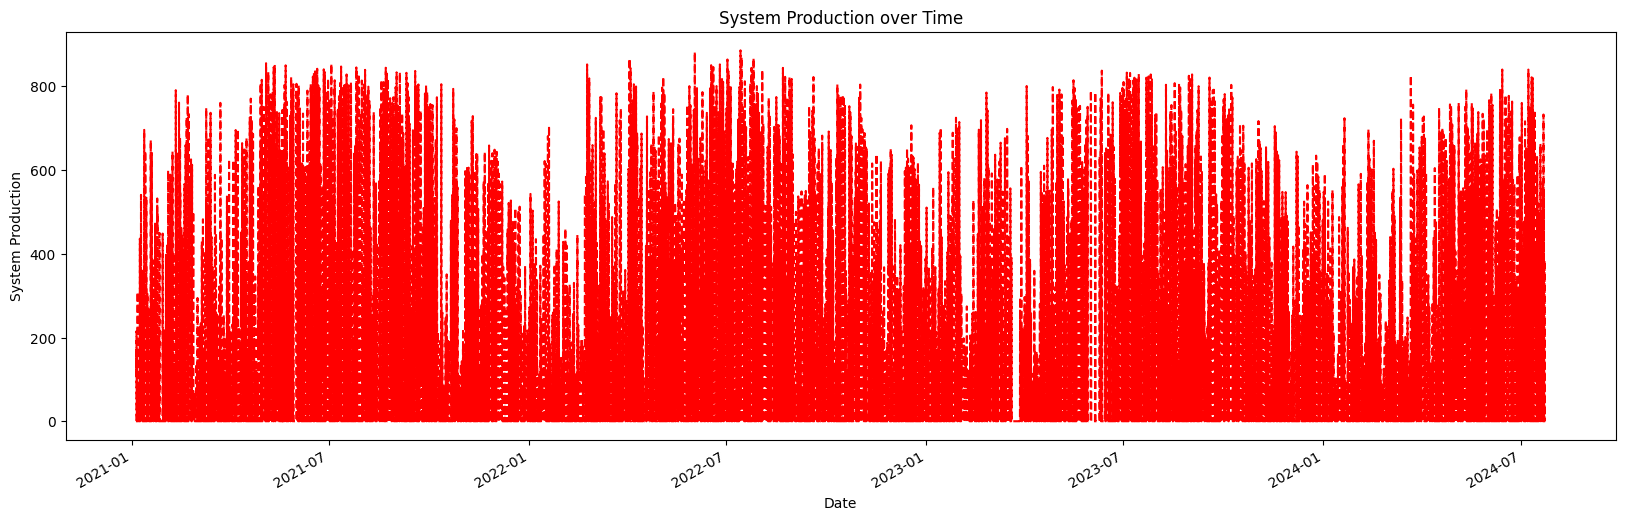

In [8]:
dfx.plot(
    style="--",
    figsize=(20,6),
    ms=5,
    legend=[],
    title="System Production over Time",
    xlabel="Date",
    ylabel="System Production",
    color='Red'
    
);

In [9]:
df = df1[['DateTime', 'Power']].rename(columns={"DateTime": "ds", "Power": "y"})
df.head()

,ds,y
0,2021-01-05 01:00:00,0.0
1,2021-01-05 02:00:00,0.0
2,2021-01-05 03:00:00,0.0
3,2021-01-05 04:00:00,0.0
4,2021-01-05 05:00:00,0.0


In [10]:
df_train = df[:25000]
df_test = df[25001:]

In [11]:

m = Prophet(weekly_seasonality=False, 
            interval_width = 0.95,
            mcmc_samples = 10)

In [12]:
m.fit(df_train)

16:43:48 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█████     | 00:00 Status


chain 1 |          | 00:00 Iteration: 6 / 10 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                  
chain 2 |██████████| 00:00 Sampling completed                  
chain 3 |██████████| 00:00 Sampling completed                  
chain 4 |██████████| 00:00 Sampling completed                  


16:43:49 - cmdstanpy - INFO - CmdStan done processing.
16:43:49 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: nor

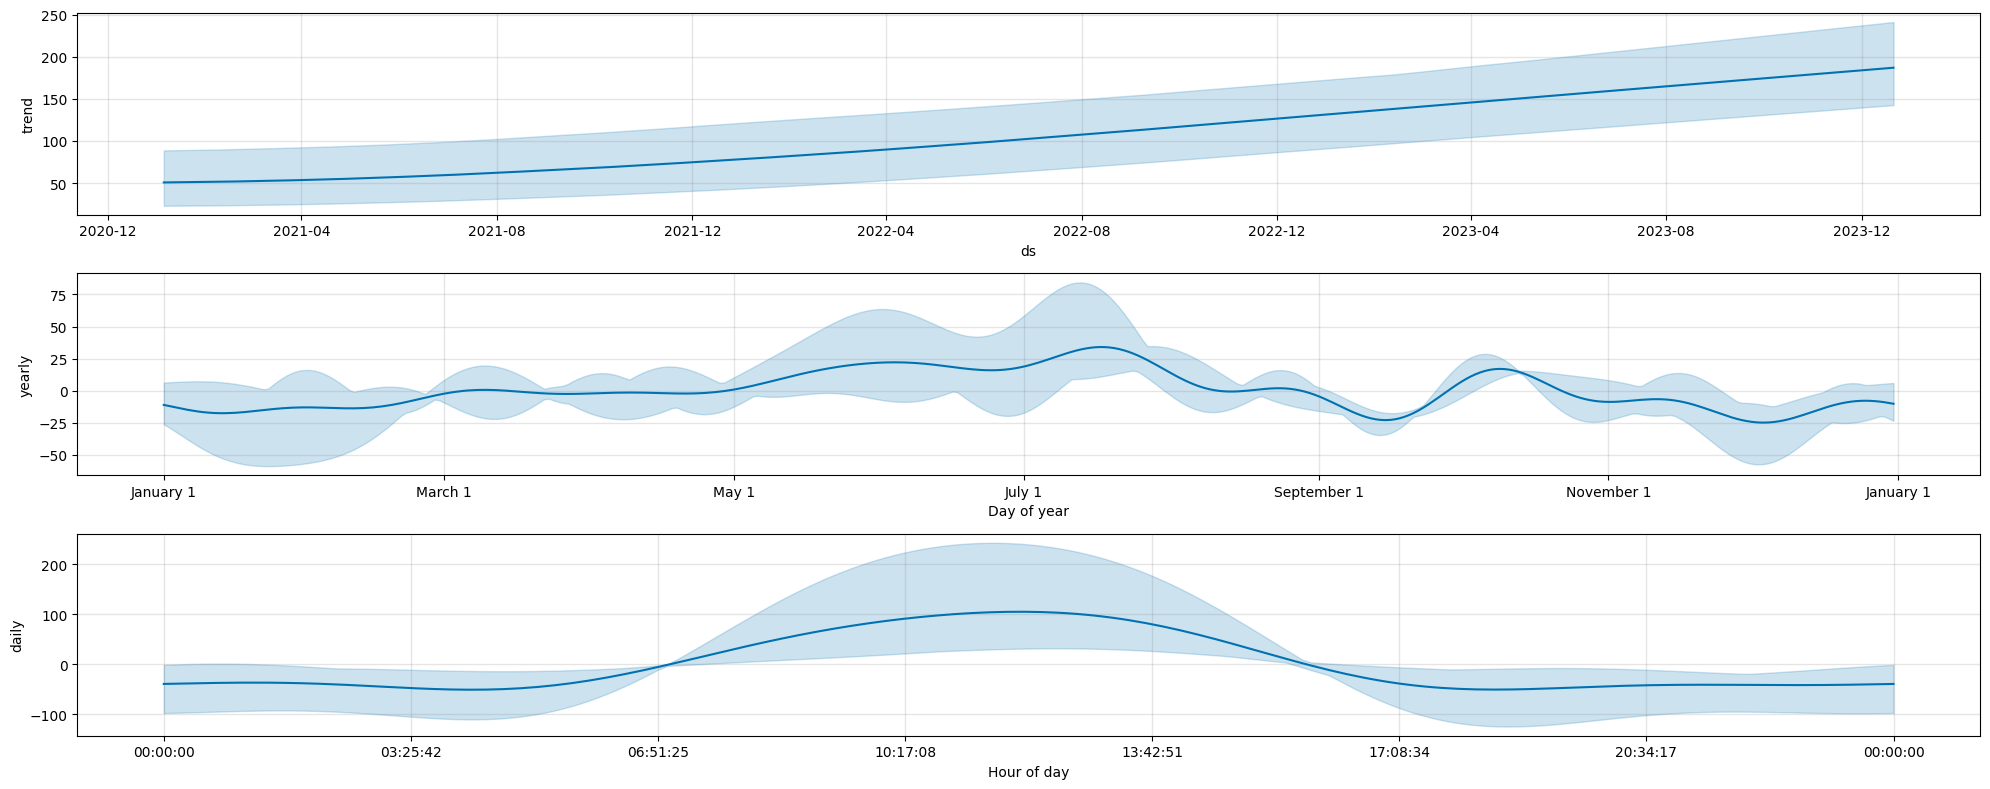

In [13]:
future = m.make_future_dataframe(periods = 24, freq = 'H')
forecast = m.predict(future)
m.plot_components(forecast,figsize=(20,8))
print()

In [23]:
future = m.make_future_dataframe(periods=len(df_test), freq='H')

# Make predictions
forecast = m.predict(future)

# Extract the forecasted values corresponding to the test period
forecast_test = forecast.iloc[-len(df_test):]

# Plot the forecast components
m.plot_components(forecast, figsize=(20,8))

ValueError: Regressor 'Irradiance' missing from dataframe

In [ ]:
df_p1 = performance_metrics(df_cv)
df_p1.head(10)

16:43:53 - cmdstanpy - INFO - Chain [1] start processing
16:43:55 - cmdstanpy - INFO - Chain [1] done processing


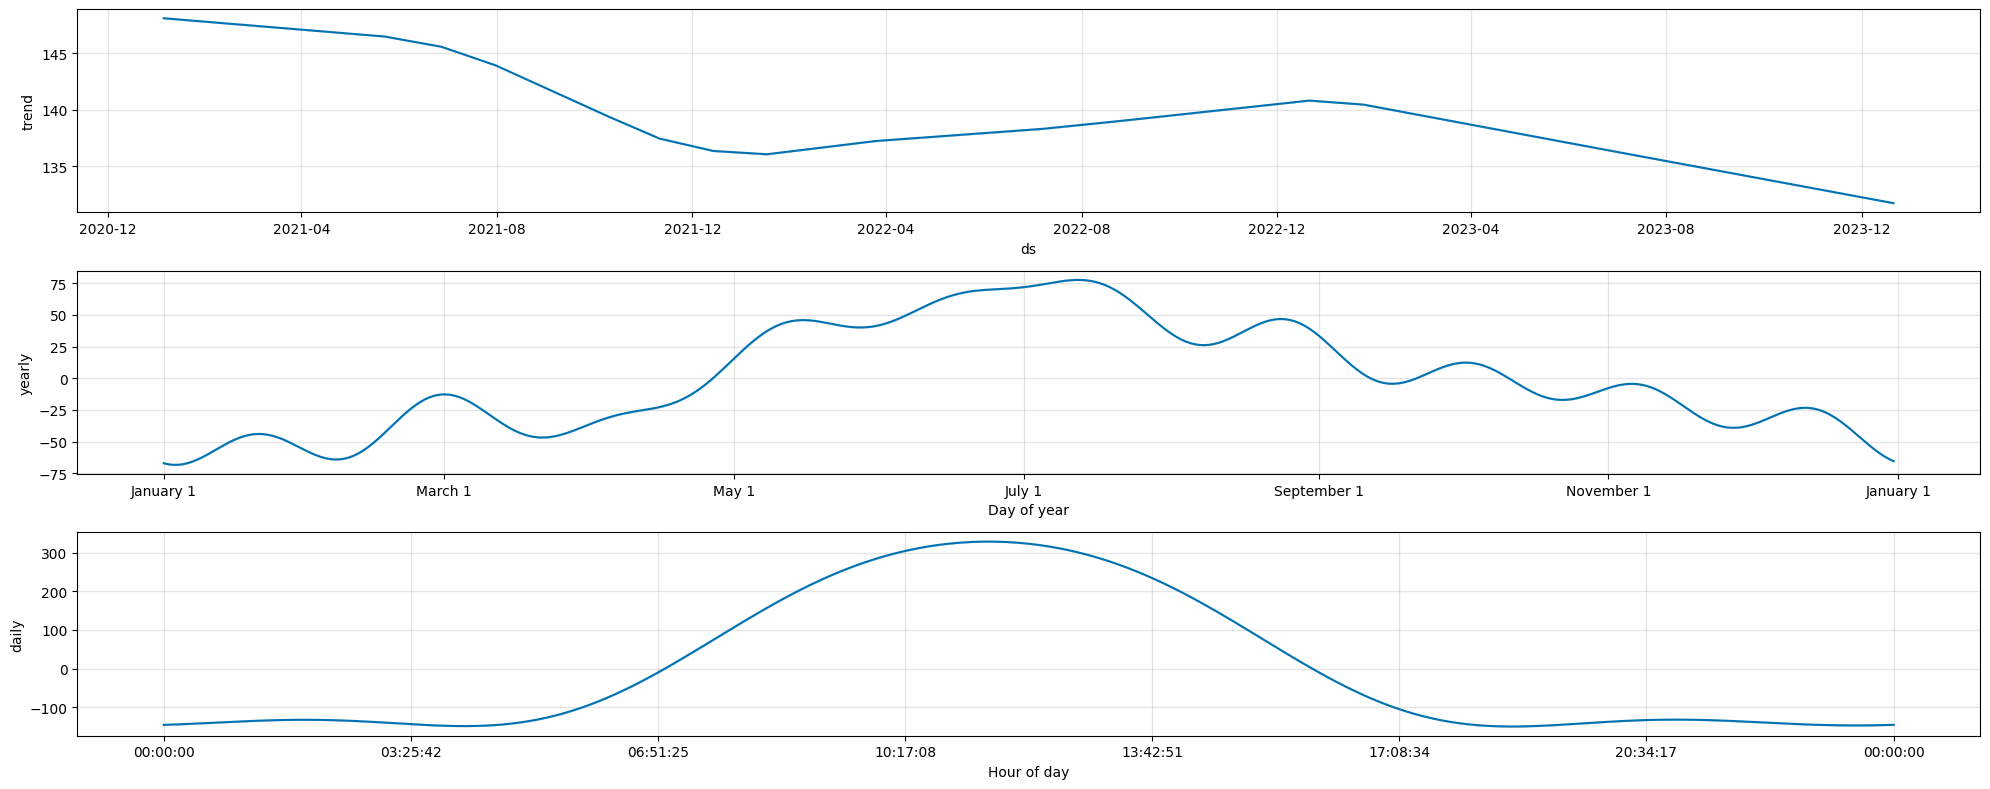

In [14]:
m = Prophet(weekly_seasonality=False, interval_width = 0.95)

m.fit(df_train)
future = m.make_future_dataframe(periods= 24, freq = 'H')
forecast = m.predict(future)
m.plot_components(forecast, figsize=(20,8))
print()

In [15]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m,initial = '3700 hours', period = '24 hours', horizon = '24 hours')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/902 [00:00<?, ?it/s]16:44:19 - cmdstanpy - INFO - Chain [1] start processing
16:44:20 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 1/902 [00:00<06:05,  2.47it/s]16:44:20 - cmdstanpy - INFO - Chain [1] start processing
16:44:20 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 2/902 [00:00<06:15,  2.40it/s]16:44:20 - cmdstanpy - INFO - Chain [1] start processing
16:44:20 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 3/902 [00:01<06:10,  2.43it/s]16:44:21 - cmdstanpy - INFO - Chain [1] start processing
16:44:21 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 4/902 [00:01<06:07,  2.44it/s]16:44:21 - cmdstanpy - INFO - Chain [1] start processing
16:44:21 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 5/902 [00:02<06:13,  2.40it/s]16:44:21 - cmdstanpy - INFO - Chain [1] start processing


In [16]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-06-09 00:00:00,-35.765105,-248.876722,178.445948,0.0,2021-06-08 23:00:00
1,2021-06-09 01:00:00,-30.037510,-259.007812,203.712896,0.0,2021-06-08 23:00:00
2,2021-06-09 02:00:00,-25.768403,-253.569030,183.596286,0.0,2021-06-08 23:00:00
3,2021-06-09 03:00:00,-31.064883,-232.140745,193.860156,0.0,2021-06-08 23:00:00
4,2021-06-09 04:00:00,-40.653497,-260.793249,193.142471,0.0,2021-06-08 23:00:00


In [17]:
df_p1 = performance_metrics(df_cv)
df_p1.head(10)

,horizon,mse,rmse,mae,mdape,smape,coverage
0,0 days 03:00:00,2572.020387,50.715090,41.348962,inf,2.000000,1.000000
1,0 days 04:00:00,2606.119323,51.050165,41.449068,inf,2.000000,1.000000
2,0 days 05:00:00,2705.250886,52.012026,42.320379,inf,2.000000,1.000000
3,0 days 06:00:00,2617.550071,51.161998,41.545429,inf,1.923037,1.000000
4,0 days 07:00:00,2323.712313,48.204899,37.849399,130.936978,1.580936,0.999533
5,0 days 08:00:00,4495.515864,67.048608,49.256120,2.162503,1.158941,0.996267
6,0 days 09:00:00,11306.431358,106.331704,79.361486,0.583936,0.809492,0.949889
7,0 days 10:00:00,22073.966829,148.573103,118.661107,0.446211,0.617972,0.857812
8,0 days 11:00:00,33154.230635,182.083032,152.286598,0.387705,0.529669,0.758917
9,0 days 12:00:00,42171.176471,205.356218,175.638734,0.364352,0.497409,0.677062


In [18]:
df_p1.mean()

horizon     0 days 13:30:00
mse            15468.629852
rmse             107.422921
mae               87.888743
mdape                   inf
smape              1.215315
coverage           0.902599
dtype: object

In [19]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

df1 = df1.dropna()

# estimator = Ridge()
# selector = RFE(estimator, n_features_to_select=1, step=1)
# selector = selector.fit(df1[list2], df1['Power'])

# to_keep = df1[list2].columns[selector.support_]
to_keep = list2
print(to_keep)

['Irradiance']


In [20]:
df = df1[['DateTime', 'Power']].rename(columns={"DateTime": "ds", "Power": "y"})

m = Prophet(weekly_seasonality=False, interval_width = 0.95)

# add the regressors to the dataframe holding the data
for f in to_keep:    
    df[f] = df1[f]
    m.add_regressor(f)

m.fit(df)

17:08:29 - cmdstanpy - INFO - Chain [1] start processing
17:08:32 - cmdstanpy - INFO - Chain [1] done processing
